In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-12-31'
stock = 'TATASTEEL.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,32.192970,32.964687,31.640383,32.497845,23.493448,40366454
1,2012-01-03,32.869415,34.660557,32.793194,34.474773,24.922617,61120216
2,2012-01-04,34.679611,35.013069,33.946007,34.674850,25.067255,57216892
3,2012-01-05,34.774887,35.394165,34.241356,34.546230,24.974274,43814647
4,2012-01-06,34.203243,35.041653,33.364838,34.646267,25.046595,47790478
...,...,...,...,...,...,...,...
3018,2024-04-01,156.800003,163.899994,156.500000,163.149994,163.149994,84583929
3019,2024-04-02,162.949997,165.500000,161.800003,164.649994,164.649994,69533405
3020,2024-04-03,164.649994,166.250000,163.100006,163.649994,163.649994,50938559
3021,2024-04-04,165.550003,165.949997,161.000000,163.399994,163.399994,61094750


In [6]:
data.shape

(3023, 7)

In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3023 non-null   datetime64[ns]
 1   Open       3023 non-null   float64       
 2   High       3023 non-null   float64       
 3   Low        3023 non-null   float64       
 4   Close      3023 non-null   float64       
 5   Adj Close  3023 non-null   float64       
 6   Volume     3023 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 165.4 KB


In [9]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3018,False,False,False,False,False,False,False
3019,False,False,False,False,False,False,False
3020,False,False,False,False,False,False,False
3021,False,False,False,False,False,False,False


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3.023000e+03
mean,61.053103,61.894010,60.108786,60.967587,53.931725,7.993499e+07
std,35.437653,35.822567,34.939165,35.365823,36.113609,6.219950e+07
min,18.816547,19.626373,18.606947,18.888002,14.492750,0.000000e+00
25%,35.813370,36.315939,35.294128,35.763350,28.274853,4.127799e+07
50%,46.112453,46.730000,45.264519,45.988598,38.239807,6.096646e+07
75%,74.099545,75.042450,73.134949,74.016537,66.000736,9.601027e+07
max,165.550003,166.250000,163.100006,164.649994,164.649994,6.428460e+08


In [11]:
data.dropna(inplace=True)

In [12]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html('data.html')

C:\Users\zenil\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                                             |                                             | [  0%]   00:00 ->…

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
ma_100_days = data.Close.rolling(100).mean()

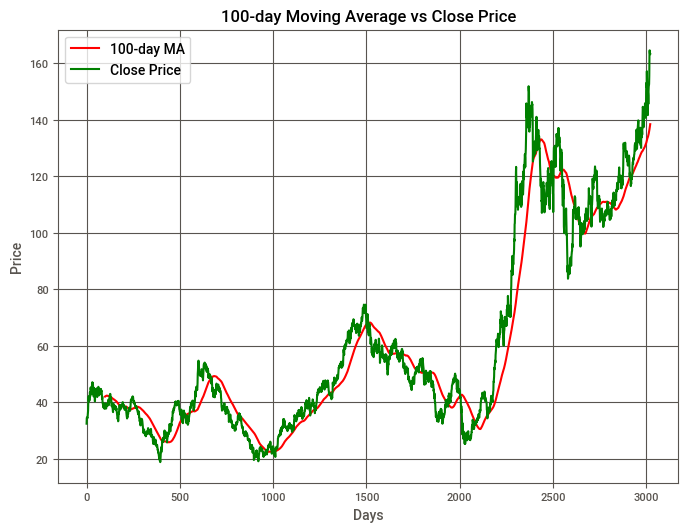

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day MA') 
plt.plot(data["Close"], 'g', label='Close Price')  

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('100-day Moving Average vs Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
ma_200_days = data.Close.rolling(200).mean()


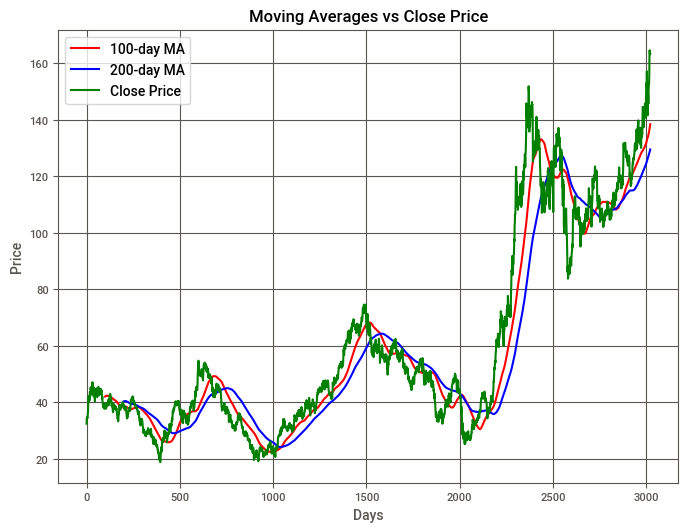

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day MA')  
plt.plot(ma_200_days, 'b', label='200-day MA')  
plt.plot(data["Close"], 'g', label='Close Price')  

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Moving Averages vs Close Price')
plt.legend()
plt.grid(True)

plt.show()


In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [18]:
data_train.shape[0]

2418

In [19]:
data_test.shape[0]

605

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [23]:
x, y = np.array(x), np.array(y)

In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\zenil\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 273ms/step - loss: 0.0300
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - loss: 0.0065
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - loss: 0.0036
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - loss: 0.0028
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0025
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0028
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0024
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - loss: 0.0022
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - loss: 0.0025
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 0.0024
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0020
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - loss: 0.0021
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0021
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - loss: 0.0019
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [44]:
data_test

,Close
0,112.404999
1,112.199997
2,112.070000
3,112.870003
4,111.110001
...,...
700,163.149994
701,164.649994
702,163.649994
703,163.399994


In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step


In [1]:
# y_predict

In [49]:
scaler.scale_

array([0.01237011])

In [48]:
1/scaler.scale_

array([80.83999634])

In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

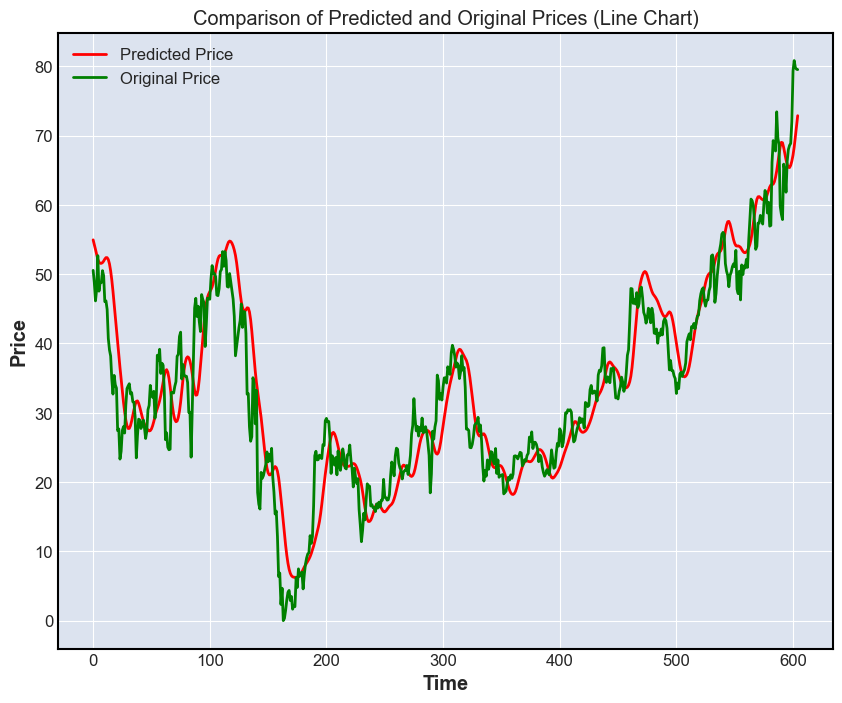

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Comparison of Predicted and Original Prices (Line Chart)')
plt.grid(True)
plt.show()

In [43]:
model.save('Stock Predictions Model.keras')